In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

IMPORT DATASET

In [2]:
train=pd.read_csv('Website Phishing.csv')
train.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


103 times 0 repeated in Result
702 times -1 repeated in Result
548 times 1 repeated in Result


<Axes: ylabel='count'>

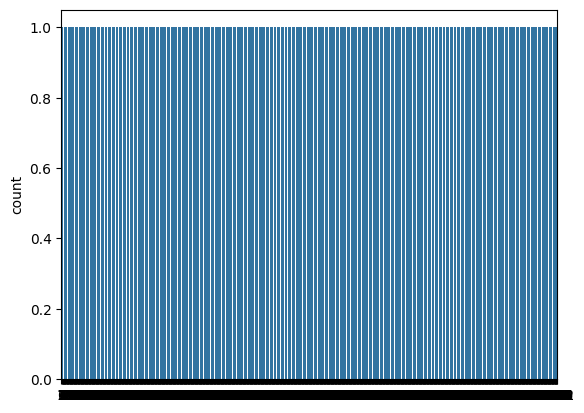

In [3]:
a=len(train[train.Result==0])
b=len(train[train.Result==-1])
c=len(train[train.Result==1])
print(a,"times 0 repeated in Result")
print(b,"times -1 repeated in Result")
print(c,"times 1 repeated in Result")
sns.countplot(train['Result'])

<Axes: >

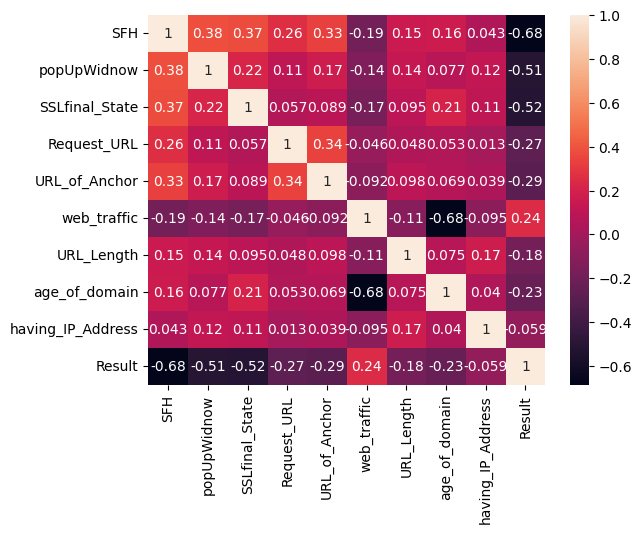

In [4]:
sns.heatmap(train.corr(),annot=True)


# STEP #2: Explore /Visualze Data set

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


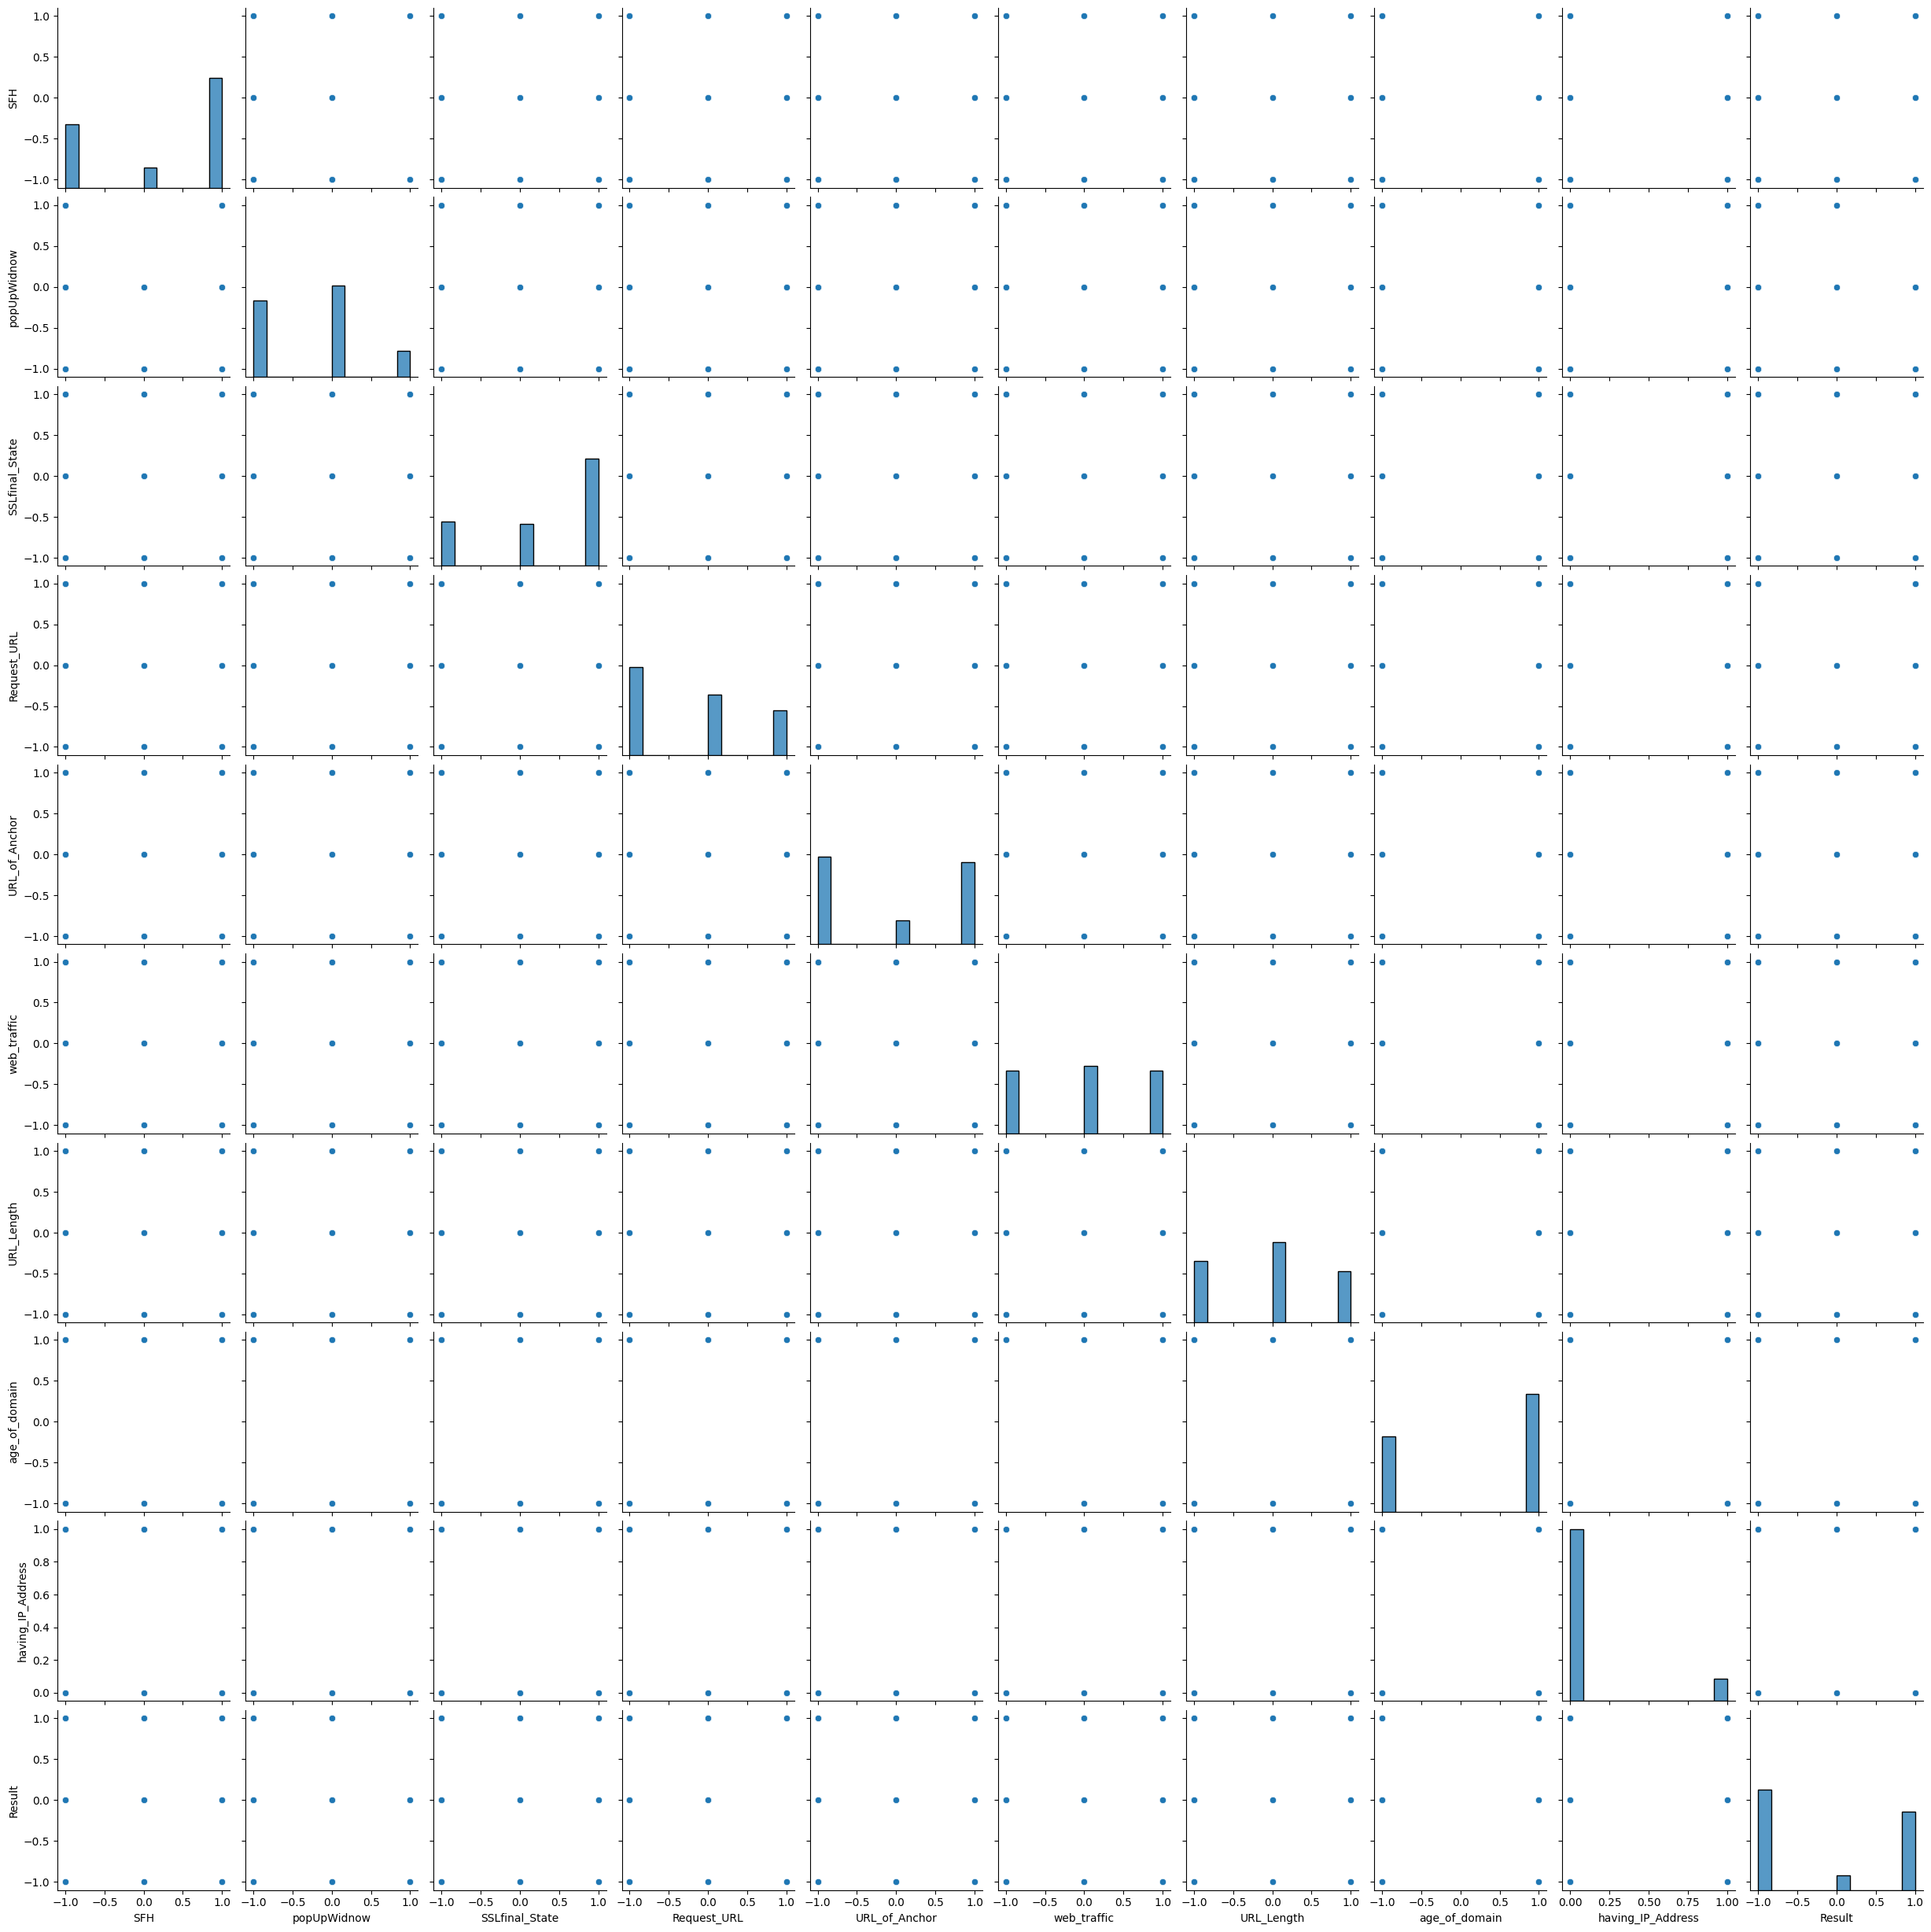

In [5]:
sns.pairplot(train)
train.describe()

# STEP #3: Prepare the Data for Training / Data Cleaning

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


<Axes: >

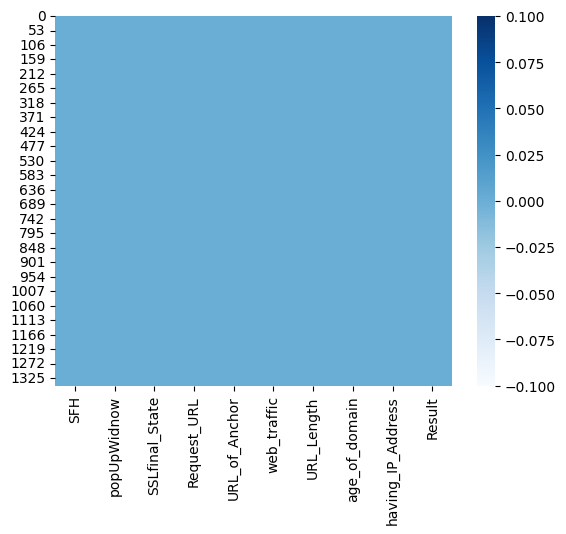

In [7]:
sns.heatmap(train.isnull(),cmap='Blues')


# STEP #4: Model Training

In [8]:
X = train.drop('Result',axis=1).values 
y = train['Result'].values

In [9]:
y

array([ 0,  1,  1, ...,  1,  1, -1], dtype=int64)

In [10]:
X

array([[ 1, -1,  1, ...,  1,  1,  0],
       [-1, -1, -1, ...,  1,  1,  1],
       [ 1, -1,  0, ..., -1,  1,  0],
       ...,
       [-1,  0, -1, ..., -1, -1,  0],
       [ 0,  0,  1, ..., -1,  1,  0],
       [ 1,  0,  1, ..., -1, -1,  0]], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=10)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 811 samples.
Testing set has 542 samples.


In [12]:
from sklearn.linear_model import LogisticRegression

#create logistic regression object
Classifier=LogisticRegression(random_state= 0, multi_class='multinomial' , solver='newton-cg')
 
#Train the model using training data 
Classifier.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

# STEP #5: Model Testing

In [13]:
#import Evaluation metrics 
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
 
#Test the model using testing data
predictions = Classifier.predict(X_test)


<Axes: >

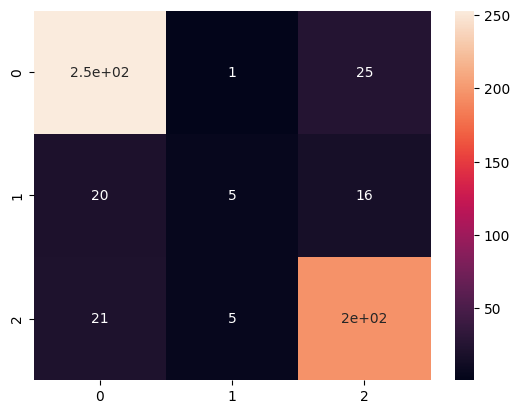

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [15]:
print("f1 score is ",f1_score(y_test,predictions,average='weighted'))
print("The accuracy is: ",100.0 *accuracy_score(y_test,predictions))


f1 score is  0.8189231549395402
The accuracy is:  83.76383763837639


In [16]:
for i in (0,len(predictions)-1):
    if(y_test[i] == predictions[i]):
        print('index = {} , y test = {} ,y predict ={}\n'.format(i,y_test[i],predictions[i]))

index = 0 , y test = -1 ,y predict =-1

